<img src="https://929687.smushcdn.com/2407837/wp-content/themes/pyi/assets/images/logo.png?lossy=1&strip=1&webp=1" width="300"/>

**by: [João Ataíde](https://www.joaoataide.com/)**
___

In [126]:
import cv2
import argparse
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [127]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.axis('off')
    plt.show()

## **Load Data**

In [128]:
args = {"image": r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\Modulo 1 - Computer Vision Basics\basic_shapes.png"}

In [129]:
image = cv2.imread(args["image"])
print("Width: %d pixels" % (image.shape[1]))
print("Height: %d pixels" % (image.shape[0]))
print("Channels: %d " % (image.shape[2]))

Width: 600 pixels
Height: 300 pixels
Channels: 3 


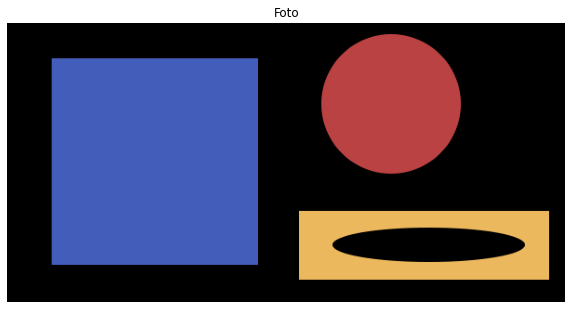

In [130]:
plt_imshow("Foto", image)

### Finding and Drawing contours

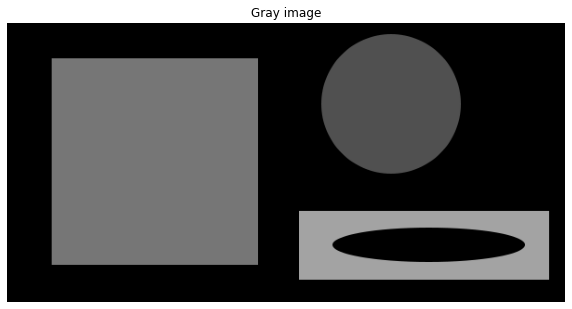

In [131]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_imshow("Gray image", gray)

In [132]:
cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
clone_conts = image.copy()

cv2.drawContours(clone_conts, cnts, -1, (255, 255, 255), 2)

print(f"Found {len(cnts)} countours")

Found 4 countours


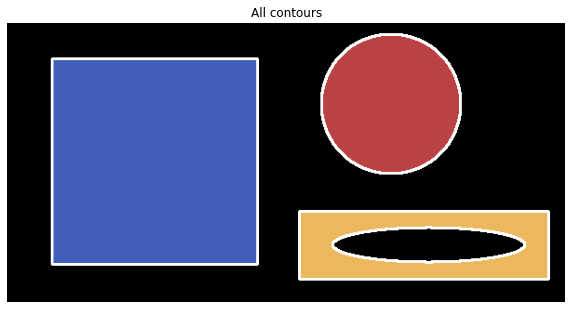

In [133]:
plt_imshow("All contours", clone_conts)

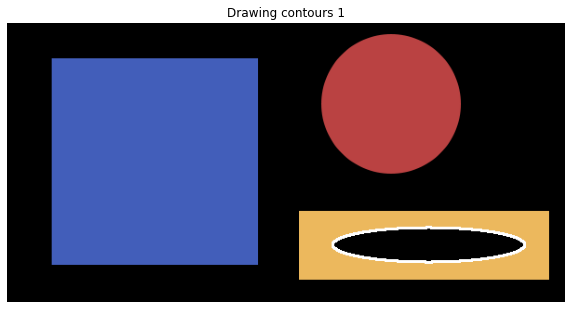

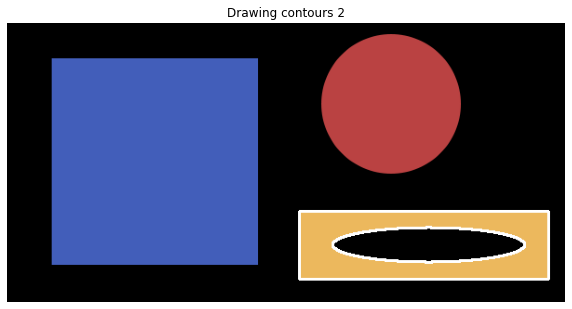

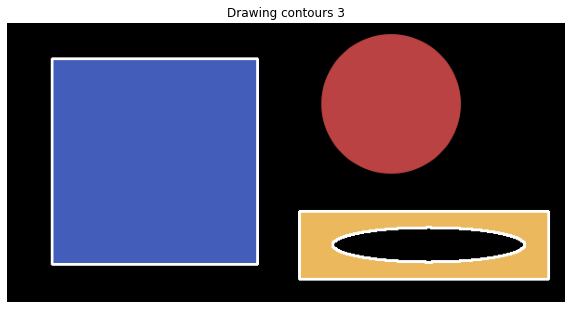

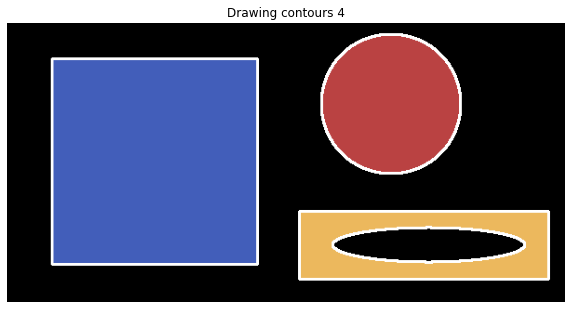

In [134]:
clone_conts = image.copy()
#cv2.destroyAllWindows()

for (i, c) in enumerate(cnts):
    cv2.drawContours(clone_conts, [c], -1, (255, 255, 255), 2)
    plt_imshow(f"Drawing contours { i + 1}", clone_conts)

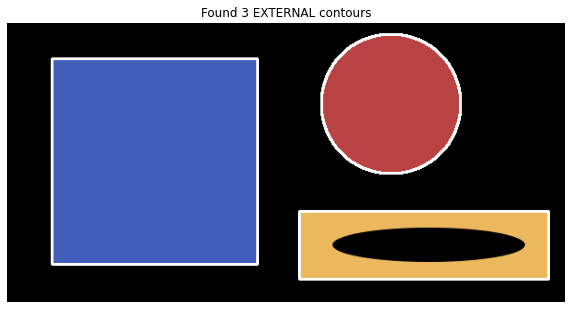

In [135]:
clone_conts = image.copy()

cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cv2.drawContours(clone_conts, cnts, -1, (255, 255, 255), 2)

plt_imshow(f"Found {len(cnts)} EXTERNAL contours", clone_conts)

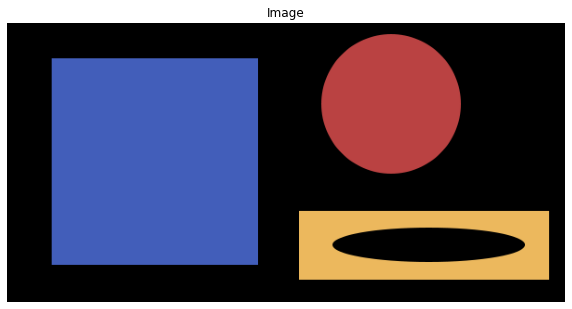

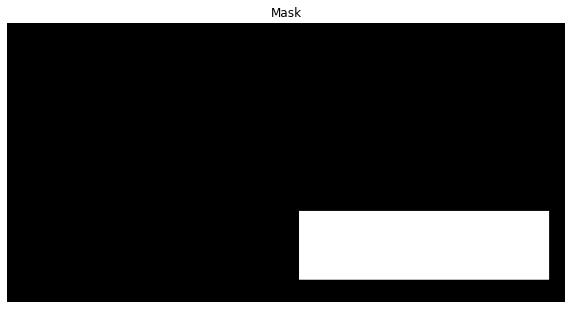

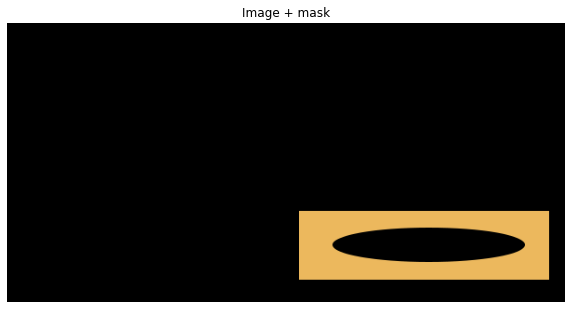

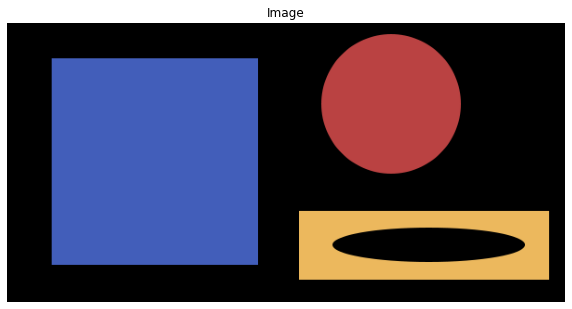

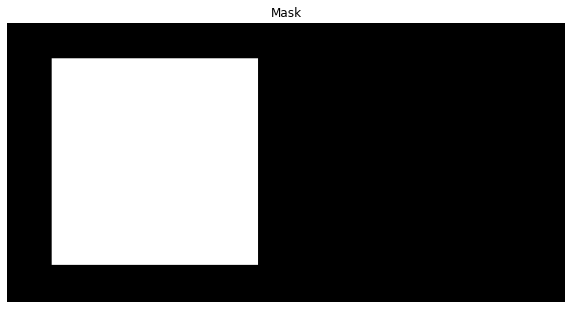

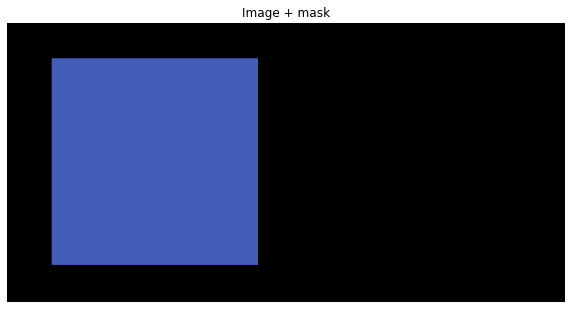

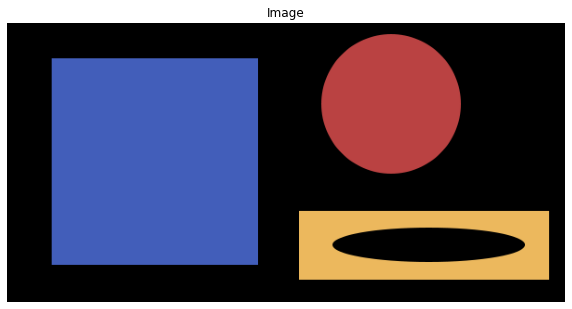

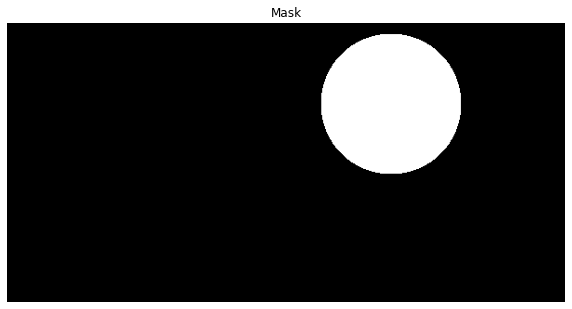

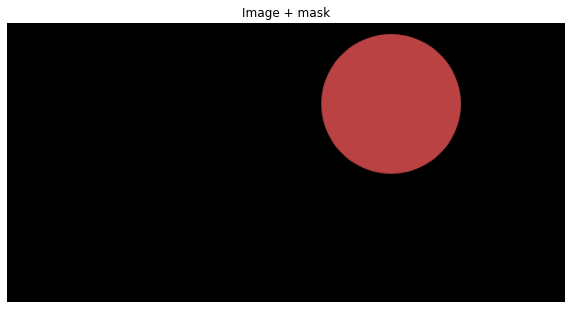

In [136]:
clone_conts = image.copy()

for c in cnts:
    mask = np.zeros(gray.shape, dtype='uint8')
    cv2.drawContours(mask, [c], -1, 255, -1)

    plt_imshow("Image", image)
    plt_imshow("Mask", mask)
    plt_imshow("Image + mask", cv2.bitwise_and(image, image, mask=mask))

### Simple contour properties

#### Centroid/Center of mass

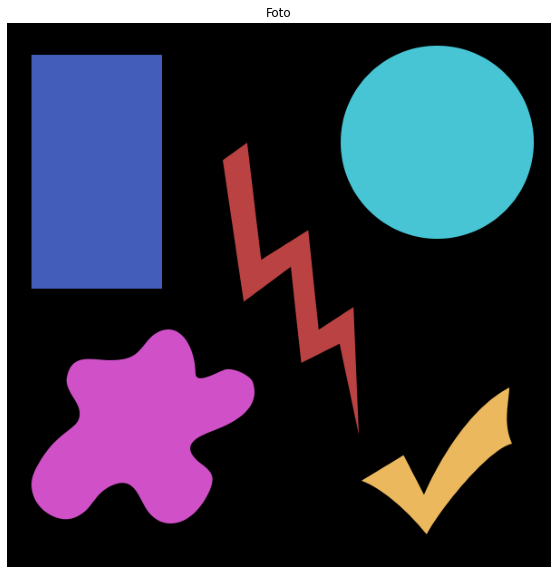

In [137]:
args = {"image": r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\Modulo 1 - Computer Vision Basics\more_shapes.png"}
image = cv2.imread(args["image"])
plt_imshow("Foto", image)

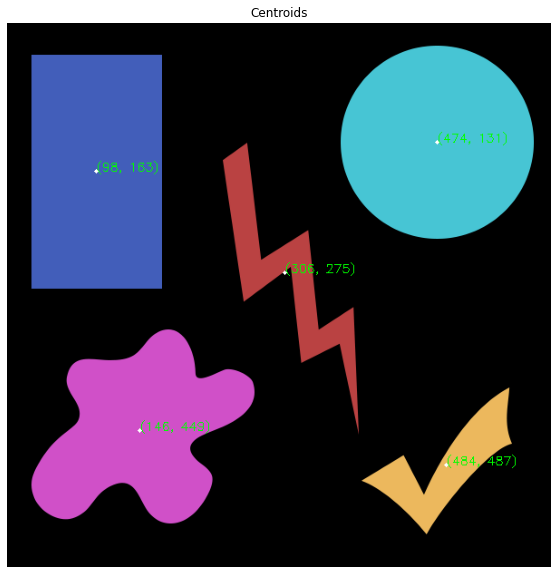

In [138]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
clone_image = image.copy()


for  c in cnts:

    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    cv2.putText(clone_image, f"{cX, cY}", (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
                0.45, (0, 255, 0), 1)

    cv2.circle(clone_image, (cX, cY), 2, (255, 255, 255), -1)
    #print(f"Coordinate X: {cX}")
    #print(f"Coordinate Y: {cY}")



plt_imshow("Centroids", clone_image)

#### Area dn Perimeters

 Contour #1 --Area: 8049.5, Perimeters: 577.394006729126
 Contour #2 --Area: 30873.0, Perimeters: 893.3178837299347
 Contour #3 --Area: 10435.5, Perimeters: 1038.5411903858185
 Contour #4 --Area: 36751.0, Perimeters: 800.0
 Contour #5 --Area: 35702.0, Perimeters: 705.0681018829346


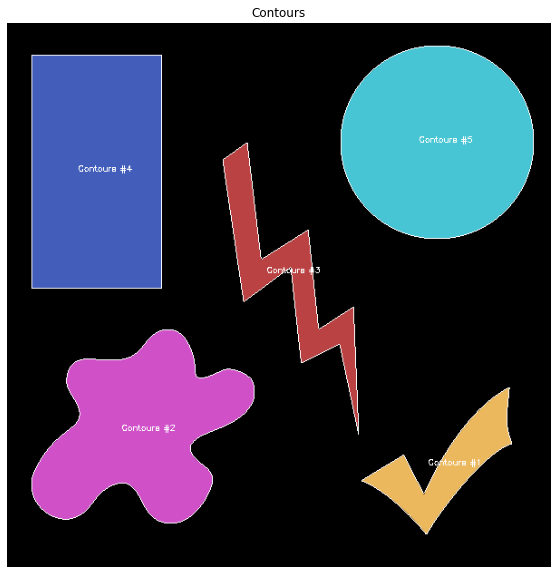

In [139]:
clone_image = image.copy()

for (i, c) in enumerate(cnts):

    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)

    print(f" Contour #{i + 1} --Area: {area}, Perimeters: {perimeter}")

    cv2.drawContours(clone_image, [c], -1, (255,255,255),1)

    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    cv2.putText(clone_image, f"Contours #{i + 1}", (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
                0.3, (255, 255, 255), 1)

plt_imshow("Contours", clone_image)

#### Bounding Boxes

#1 (391, 402, 166,162)
#2 (27, 338, 246,214)
#3 (238, 132, 150,322)
#4 (27, 35, 144,258)
#5 (368, 25, 213,213)


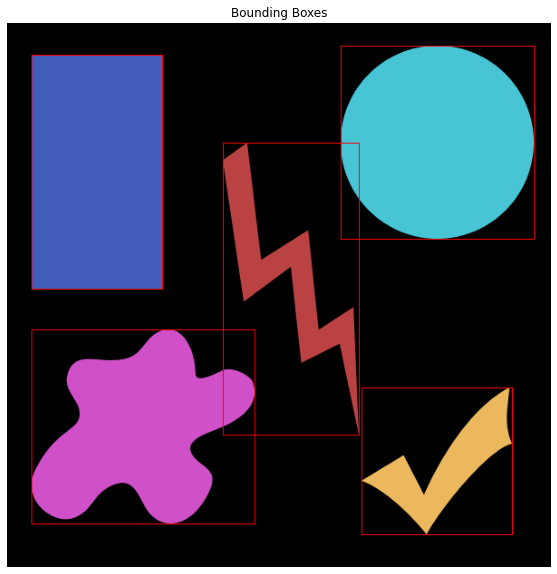

In [140]:
clone_image = image.copy()

i = 1
for c  in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(clone_image, (x, y), (x + w, y +h), (0, 0, 255), 1)
    print(f"#{i} ({x}, {y}, {w},{h})")
    i += 1
plt_imshow("Bounding Boxes", clone_image)

#### Rotated Bounding Boxes

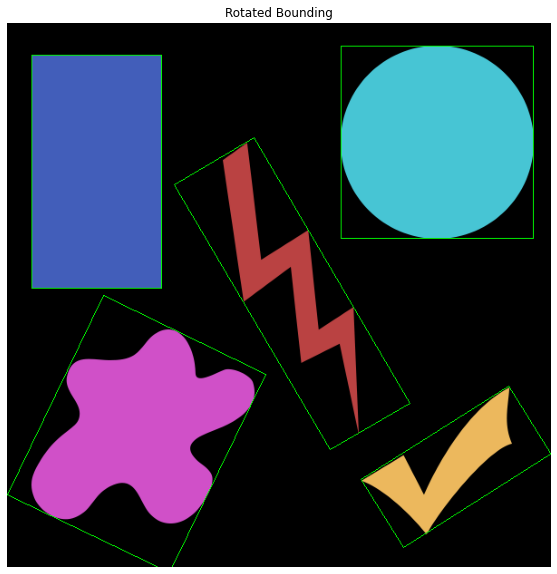

In [141]:
clone_image = image.copy()

for c in cnts:
    box = cv2.minAreaRect(c)
    box = np.int0(cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box))
    cv2.drawContours(clone_image, [box], -1, (0, 255, 0), 1)

plt_imshow("Rotated Bounding", clone_image)

#### Minimum Enclosing Circles

#1: 97.78652954101562
#2: 136.8111114501953
#3: 172.0589599609375
#4: 147.05282592773438
#5: 107.07483673095703


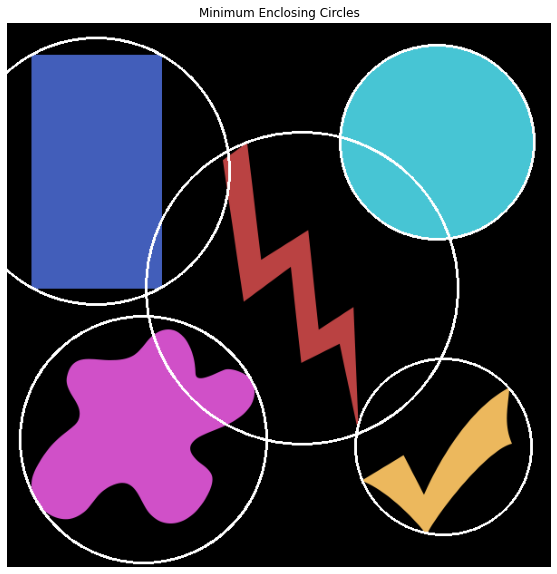

In [142]:
clone_image = image.copy()

i = 1
for c in cnts:
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(clone_image, (int(x), int(y)), int(radius), (255, 255, 255), 2)
    print(f"#{i}: {radius}")

    i += 1

plt_imshow("Minimum Enclosing Circles", clone_image)

#### Fitting an Ellipse

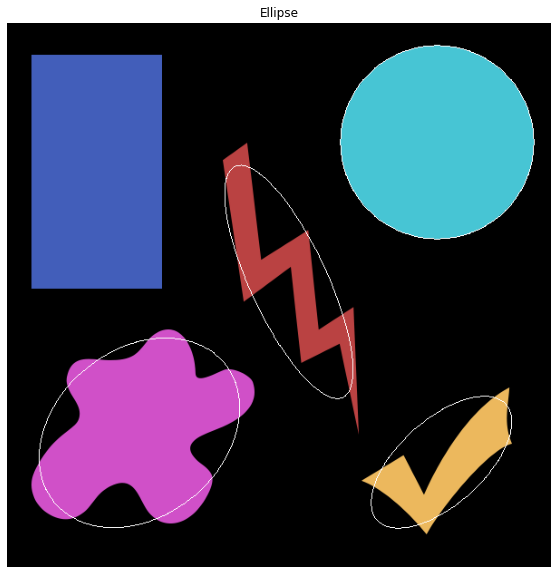

In [143]:
clone_image = image.copy()

for c in cnts:
    if len(c) >= 5:

        ellipse = cv2.fitEllipse(c)
        cv2.ellipse(clone_image, ellipse, (255, 255, 255), 1)

plt_imshow("Ellipse", clone_image)

### Advanced contour properties

Aspect Ratio: image width / image height

* If aspect ratio > 1 shapes will appear more "tall"
* If aspect ratio < 1 shapes will appear to be more "tall"

Extent: shape area/ bounding box area

* bounding box area = bounding box width x bounding box height

Convex Hull: as a super elastic rubber band to bundle together a bunch of envelopes.

Solidity: contour area / convex hull area

#### Distinguishing Between X’s and O’s

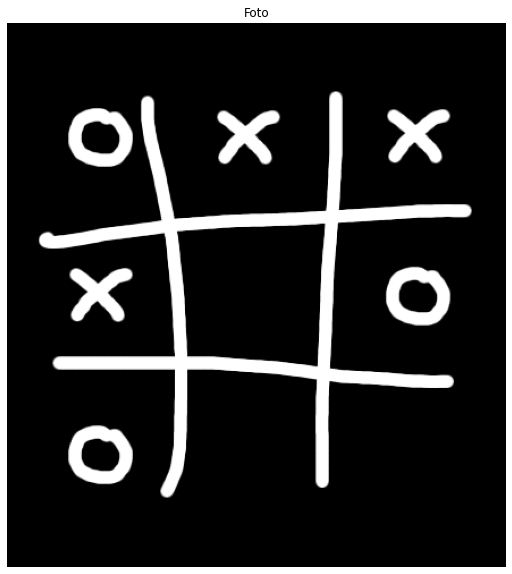

In [144]:
args = {"image": r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\Modulo 1 - Computer Vision Basics\tictactoe.png"}
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_imshow("Foto", gray)

o (Contour #1 -- Solidity 0.9832207898506241
x (Contour #2 -- Solidity 0.6007447248655358
o (Contour #3 -- Solidity 0.9832207898506241
x (Contour #4 -- Solidity 0.6007447248655358
x (Contour #5 -- Solidity 0.6007447248655358
o (Contour #6 -- Solidity 0.9832207898506241
? (Contour #7 -- Solidity 0.2790210442816481


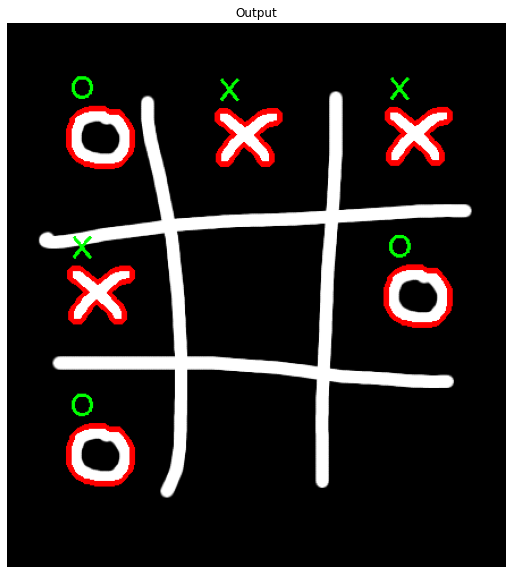

In [145]:
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for (i, c) in enumerate(cnts):

    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    solidity = area / float(hull_area)

    char = "?"

    if solidity > 0.9:
        char = "o"

    elif solidity > 0.5:
        char = "x"

    if char != "?":
        cv2.drawContours(image, [c], -1, (0, 0, 255), 3)
        cv2.putText(image, char, (x, y -10), cv2.FONT_HERSHEY_SIMPLEX, 1.25,
                    (0, 255, 0), 2)

    print(f"{char} (Contour #{i + 1} -- Solidity {solidity}")


plt_imshow("Output", image)

#### Identifying Tetris Blocks

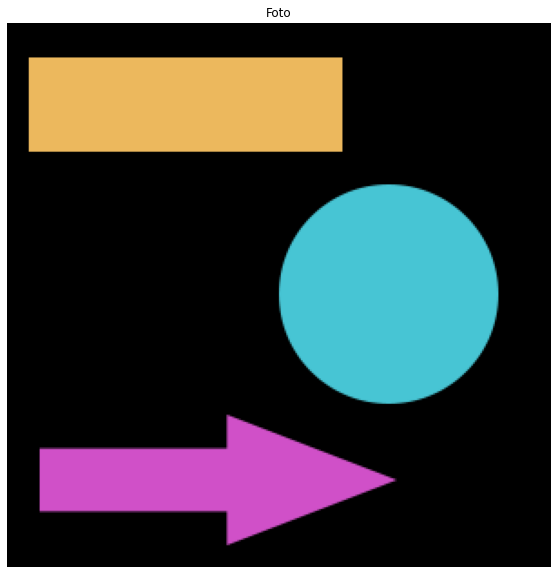

In [244]:
args = {"image": r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\Modulo 1 - Computer Vision Basics\more_shapes_example.png"}
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_imshow("Foto", image)

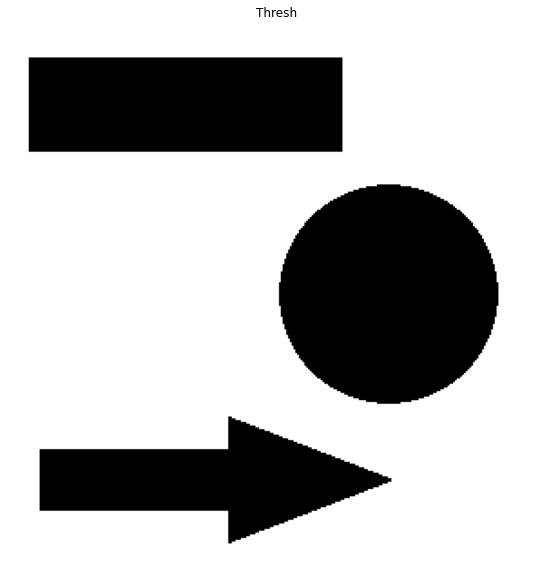

In [245]:
thresh = cv2.threshold(gray, 125,255, cv2.THRESH_BINARY_INV)[1]
plt_imshow("Thresh ", thresh)

In [246]:
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
hullImage = np.zeros(gray.shape[:2], dtype="uint8")

Contour #1 -- aspect_ratio=2.74, extent=0.49, solidity=0.78


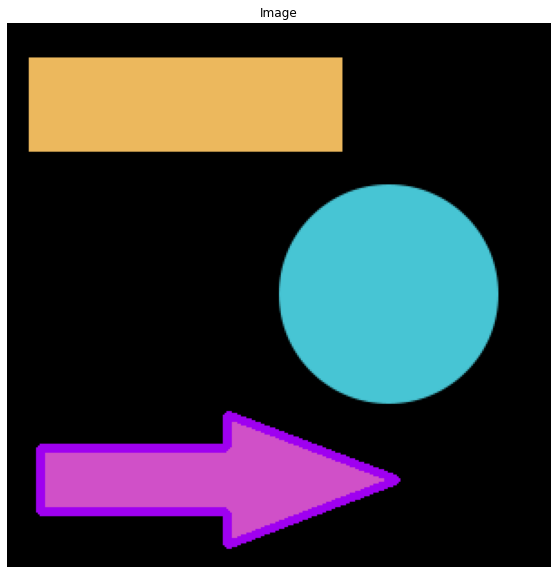

Contour #2 -- aspect_ratio=1.00, extent=0.79, solidity=0.99


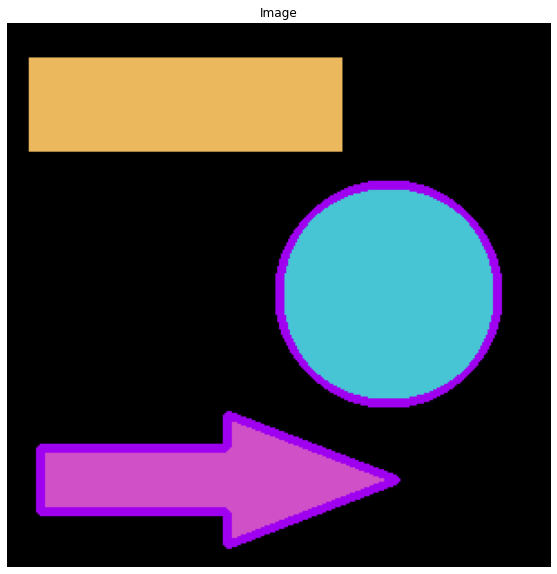

Contour #3 -- aspect_ratio=3.33, extent=0.98, solidity=1.00


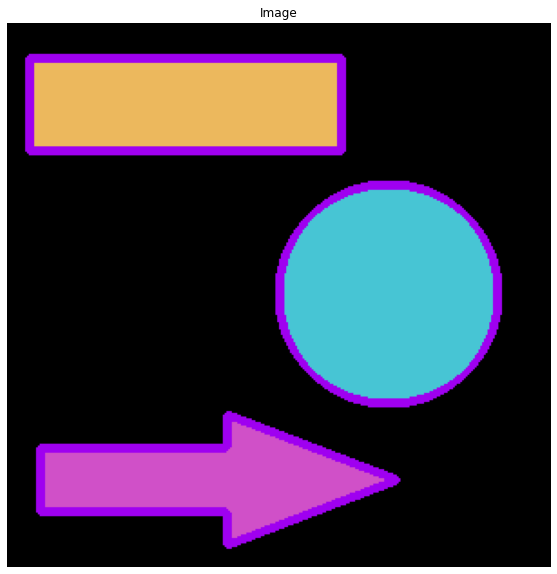

In [247]:
for (i, c) in enumerate(cnts):

    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    aspectRatio = w / float(h)
    extent = area / float(w * h)

    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    cv2.drawContours(hullImage, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
    shape = ""


    #if 0.98 <= aspectRatio <= 1.02:
    #    shape = "SQUARE"
    #elif aspectRatio >= 3.0:
    #    shape = "RECTANGLE"
    #elif extent < 0.65:
    #    shape = "L-PIECE"
    #elif solidity > 0.80:
    #    shape = "Z-PIECE"
    if solidity > 1.0:
        shape = "CIRCLE"

    cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                (240, 0, 159), 2)

    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
          .format(i + 1, aspectRatio, extent, solidity))

    #plt_imshow("Convex Hull", hullImage)
    plt_imshow("Image", image)

#### Contour approximation

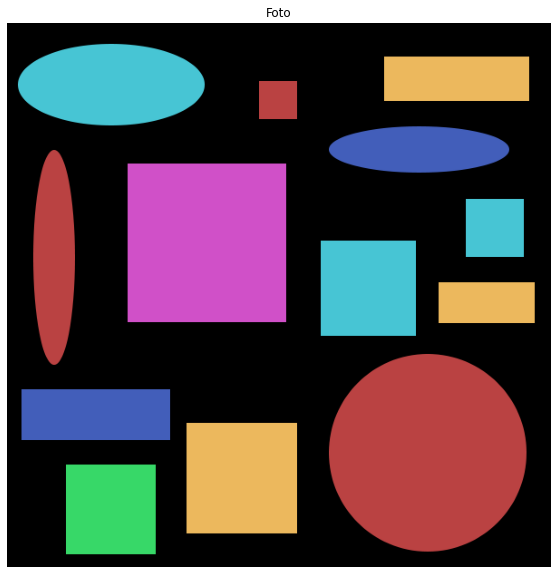

In [278]:
args = {"image": r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\Modulo 1 - Computer Vision Basics\contours_circles_and_squares.png"}
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_imshow("Foto", image)

In [279]:
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

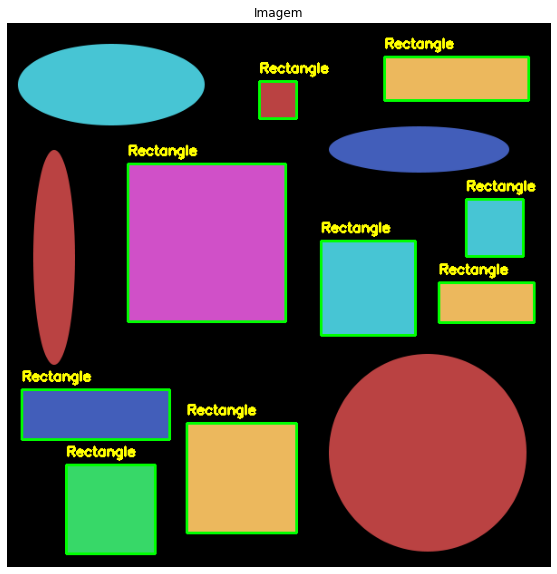

In [280]:
for c in cnts:

    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
        (x, y, w, h) = cv2.boundingRect(approx)
        cv2.putText(image, "Rectangle", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 255, 255), 2)

plt_imshow("Imagem", image)

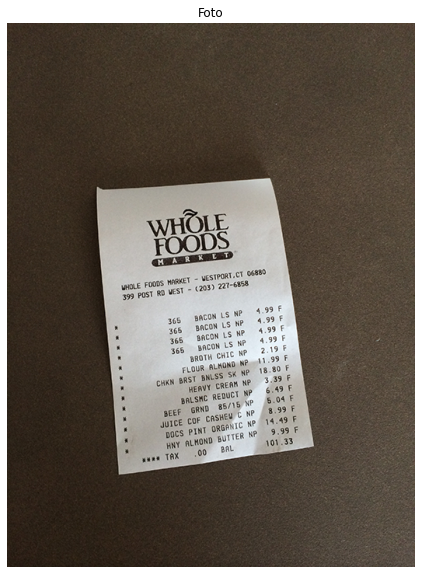

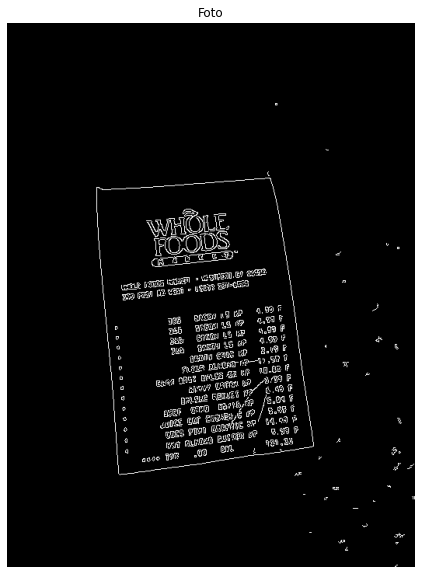

In [255]:
args = {"image": r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\Modulo 1 - Computer Vision Basics\receipt.png"}
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edged = cv2.Canny(gray, 75, 200)
plt_imshow("Foto", image)
plt_imshow("Foto", edged)

Original: 279, approx: 4
Original: 18, approx: 18
Original: 22, approx: 22
Original: 29, approx: 22
Original: 22, approx: 22
Original: 13, approx: 13
Original: 31, approx: 22


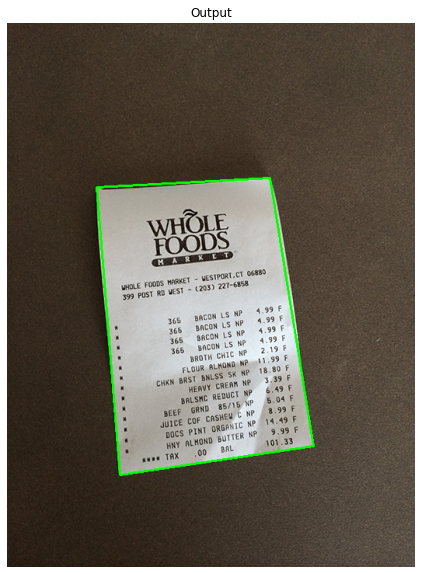

In [257]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:7]

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * peri, True)

    print("Original: {}, approx: {}".format(len(c), len(approx)))

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)

plt_imshow("Output", image)

#### Sorting Contours

In [282]:
def sort_contours(cnts, method="left-to-right"):

    reverse = False
    i = 0

    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b:b[1][i], reverse=reverse))

    return (cnts, boundingBoxes)

In [281]:
def draw_contour(image, c, i):

    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    cv2.putText(image, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
                1.0, (255, 255, 255), 2)

    return image

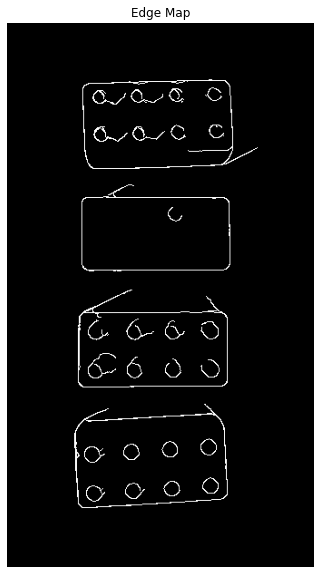

In [287]:
args = {"image": r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\Modulo 1 - Computer Vision Basics\lego_blocks_1.png"}
image = cv2.imread(args["image"])
accumEdged = np.zeros(image.shape[:2], dtype="uint8")


for chan in cv2.split(image):

    chan = cv2.medianBlur(chan, 11)
    edged = cv2.Canny(chan, 50, 200)
    accumEdged = cv2.bitwise_or(accumEdged, edged)


plt_imshow("Edge Map", accumEdged)

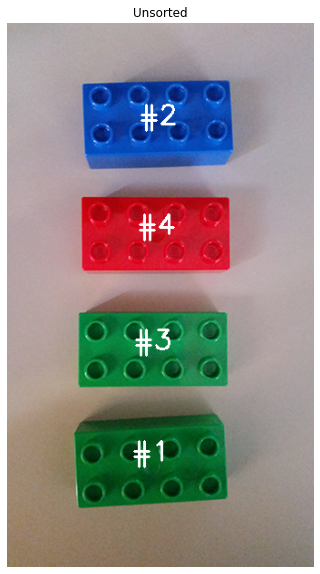

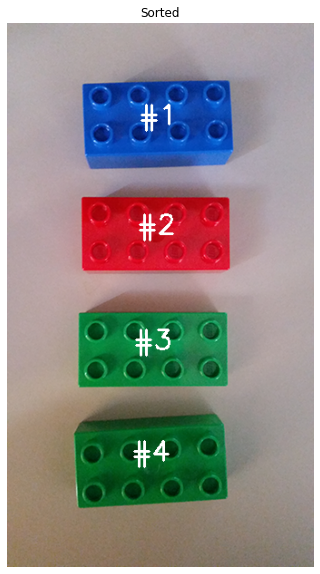

In [288]:
cnts= cv2.findContours(accumEdged.copy(), cv2.RETR_EXTERNAL,
                       cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
orig = image.copy()

for (i, c) in enumerate(cnts):
    orig = draw_contour(orig, c, i)

plt_imshow("Unsorted", orig)

(cnts, boundingBoxes) = sort_contours(cnts, method="right-to-left")

for (i, c) in enumerate(cnts):
    draw_contour(image, c, i)

plt_imshow("Sorted", image)